**Vizualizacija Koronavirusa in smrtnosti virusa worldwide** (do 30.3.2020)

In [128]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# IMPORTANT : source is local, for testing use your own path
reader = pd.read_csv(r"C:\Users\Dom\PR20NERJZ\podatki\corona_worldwide.csv")

virus_array = reader.get_values()    #create array of data
reader.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
1,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
2,28/03/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
3,27/03/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,26/03/2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0


In [211]:
def izrisi(array, country_name, search):   
    my_lines = []
    my_cases = []
    my_deaths = []
    curr_cases = 0
    curr_deaths = 0
    check = False;
    
    #print(search)
    if search == "cases" or search == "deaths" or search == "both":
        
        flipped_array = np.flip(array, 0)   #flip the input array, so the dates are in the right order

        for row in flipped_array:
            if row[6].lower() == country_name.lower():    #name checker
                if row[4] != 0 or check == True:    #remove false/useless data (0 cases, pre-confirmation and such)
                    #print(row)
                    check = True;
                    my_lines.append(row)
                    my_cases.append(row[4] + curr_cases)
                    my_deaths.append(row[5] + curr_deaths)
                    curr_cases += row[4]
                    curr_deaths += row[5]

        if len(my_lines) == 0:
            raise ValueError("The country does not exist, try entering it in English")

        plt.figure(figsize=(20,10)) 
        
        if search == "cases":
            plt.plot(my_cases, label=my_lines[0][6]+ " - cases")
            plt.ylabel("Num. of confirmed cases")
            plt.title("Confirmed cases of Covid-19 in " + my_lines[0][6])
            if curr_cases < 2000:
                plt.yticks(np.arange(0, max(my_cases), 100))    #ticks set so they dont intertwine
            elif curr_cases < 50000:
                plt.yticks(np.arange(0, max(my_cases), 1000))
            else:
                plt.yticks(np.arange(0, max(my_cases), 2000))

        elif search == "deaths":
            plt.plot(my_deaths, label=my_lines[0][6]+ " - deaths")
            plt.ylabel("Num. of confirmed deaths")
            plt.title("Confirmed deaths by Covid-19 in " + my_lines[0][6], fontdict={'fontsize': 15})
            print(curr_deaths)
            if curr_deaths < 30:
                plt.yticks(np.arange(0, max(my_deaths)+1, 1))
                
        elif search == "both":
            plt.plot(my_cases, label=my_lines[0][6]+" - confirmed cases")
            plt.plot(my_deaths, label=my_lines[0][6]+" - deaths")
            plt.ylabel("Num. of confirmed cases/deaths")
            plt.title("Confirmed cases/deaths of Covid-19 in " + my_lines[0][6])
            if curr_cases < 2000:
                plt.yticks(np.arange(0, max(my_cases)+100, 100))
            elif curr_cases < 50000:
                plt.yticks(np.arange(0, max(my_cases)+1000, 1000))
            else:
                plt.yticks(np.arange(0, max(my_cases)+1000, 2000))
        
        plt.xlabel("Num. of days since the first confirmed case")
        plt.legend(loc="upper left")
        plt.grid(alpha=0.7)
        plt.show()
    else:
        raise ValueError("Wrong input on search, options: cases, deaths, both")

6


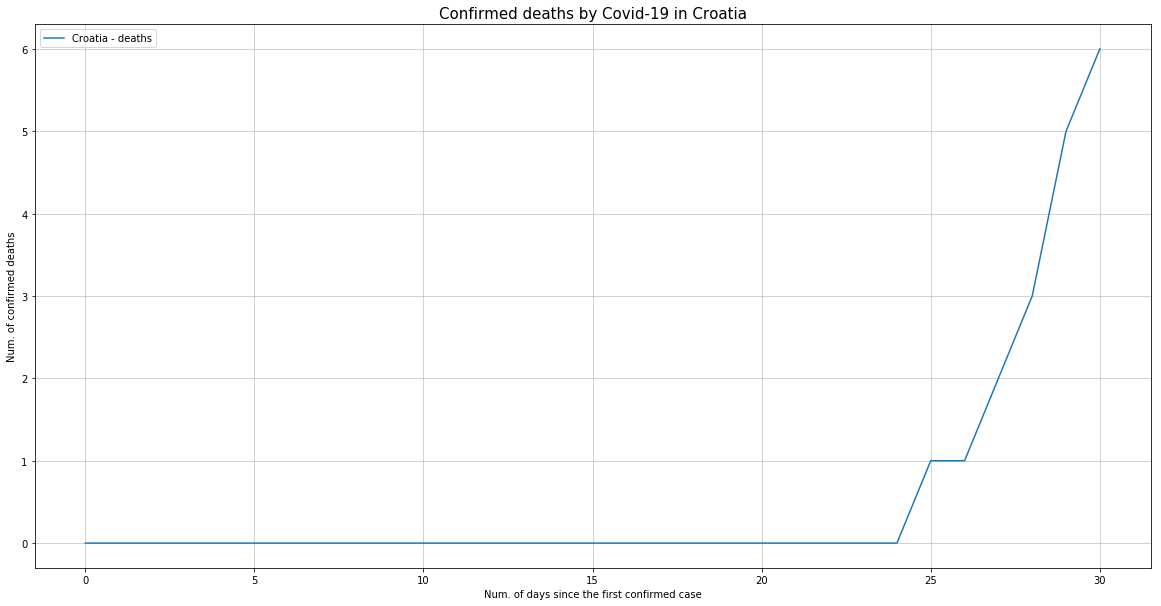

In [212]:
izrisi(virus_array, "croatia", "deaths")